## this module is to identify handwritten numbers and determine what this number is equivalent to 

#### this dataset is made up of 1797  8x8 images  

In [2]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

### What the data contains ?

In [40]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
digits.data[0] #first image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### this aquare matrix is image 8x8 and we will print this image 

<Figure size 432x288 with 0 Axes>

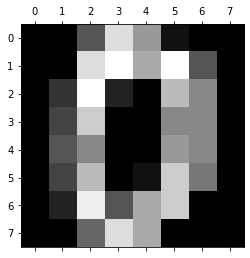

In [46]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

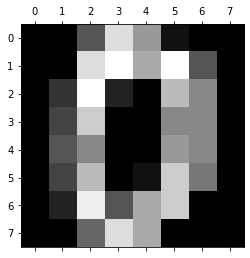

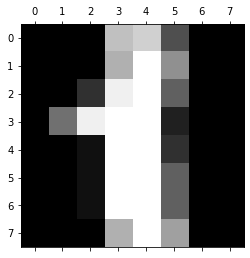

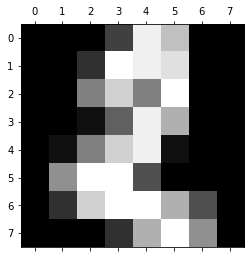

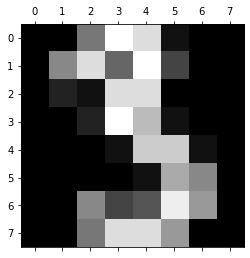

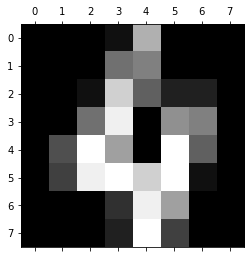

In [47]:
plt.gray() 
for i in range(5):                                                   # print first 5 images
    plt.matshow(digits.images[i])

## checking what do this 5 images actually represent a true number 

In [48]:
digits.target[0:5]                     #this images represent numbers from 0 to 4

array([0, 1, 2, 3, 4])

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")

In [23]:
from sklearn.model_selection import train_test_split


### dividing the data to a training and testing data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, train_size=0.7)


In [59]:
len(X_train)

1257

In [60]:
len(X_test)

540

In [70]:
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

# Measure accuracy of our model


In [71]:
model.score(X_train, y_train)


0.9960222752585521

In [72]:
model.score(X_test, y_test)


0.9462962962962963

## fetching a random item and check it 

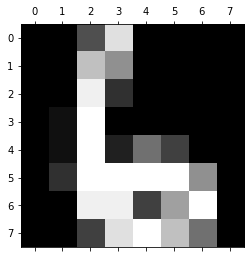

In [73]:
plt.matshow(digits.images[67])

## knowing what this image represent 

In [75]:
digits.target[67]                  # this image represent number 6

6

## checking the model with this sample

In [79]:
model.predict([digits.data[67]])   # true answer

array([6])

In [78]:
model.predict(digits.data[0:5])   # true answer


array([0, 1, 2, 3, 4])

# Confusion Matrix


In [80]:
y_predicted = model.predict(X_test)


In [93]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_predicted)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 51,  0,  1,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  1, 55,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0, 55,  1,  0],
       [ 0,  3,  1,  1,  0,  1,  0,  0, 49,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  2, 50]], dtype=int64)

Text(69.0, 0.5, 'Truth')

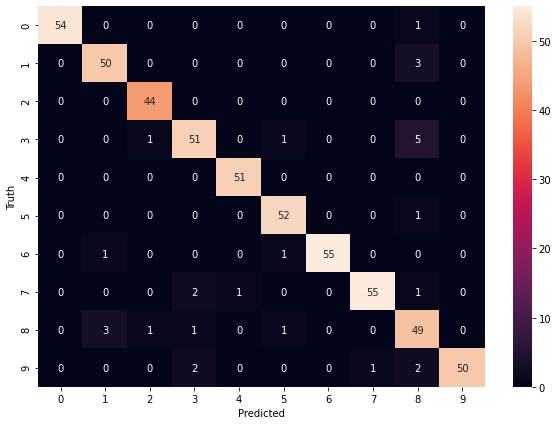

In [84]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')